In [ ]:
#! pip install textblob

In [2]:
import pandas as pd
import pickle
from textblob import TextBlob
import re 
import string
from lyricsgenius import Genius

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
songAttributes = pd.read_pickle('songsWithLyrics.pkl')

In [5]:
clientid = 'vHqixP8O2UlLPXgkfxNqgBslNgeEjbPut_I_W8yRHQUji4Fd_XHIfbdmfWZaTo-i'
token = 'NVpYyXA_VZXEqtb_6eolyLa0D_PE9yp_0NFCat0LywlG_VDSOjcgVEuOeCiEYpu2'

genius = Genius(token)
genius.remove_section_headers = True
genius.skip_non_songs = True

def getLyrics(artistName, songName):
    result = genius.search_song(songName, artistName)
    if result is not None:
        return result.lyrics
    else:
        if "'" in artistName:
            artistName = addSlashToApostrophe(artistName) 
        if "'" in songName:
            songName = addSlashToApostrophe(songName)
        result = genius.search_song(songName, artistName)
        if result is not None:
            return result.lyrics
        return None

In [6]:
songAttributes.loc[songAttributes['Title'] == 'Youth (feat. Khalid)', ['Lyrics']] = getLyrics("Shawn Mendes", "Youth")

Searching for "Youth" by Shawn Mendes...
Done.


In [7]:
songAttributes.loc[songAttributes['Title'] == 'Like To Be You (feat. Julia Michaels)', ['Lyrics']] = getLyrics("Shawn Mendes", "Like To Be You")

Searching for "Like To Be You" by Shawn Mendes...
Done.


In [8]:
mendesArmyDF = songAttributes.loc[songAttributes.Artist == 'Shawn Mendes']

In [9]:
mendesArmyDF.to_pickle('mendesArmyDF.pkl')

In [10]:
mendesArmyDF

,Title,Artist,SpotifyID,Tempo,Loudness,Key,isExplicit,Duration,ReleaseDate,Lyrics
665,In My Blood,Shawn Mendes,2QZ7WLBE8h2y1Y5Fb8RYbH,140.025,-7.321,F,False,211.36,2018-05-25,"Help me, it's like the walls are caving in\nSo..."
666,Fallin' All In You,Shawn Mendes,5EYBryPOgIEPB7r5QIy6eG,92.038,-6.696,"G#, Ab",False,235.747,2018-05-25,Sunrise with you on my chest\nNo blinds in the...
667,Where Were You In The Morning?,Shawn Mendes,376Gg7Oxo5C5jUWDWpVXeI,87.963,-7.472,G,False,200.6,2018-05-25,"You said, ""I wanna get to know ya""\nWhy you go..."
668,Nervous,Shawn Mendes,5wxurz8J6YlyQRNnGN8zXS,121.983,-6.76,C,False,164.147,2018-05-25,I saw you on a Sunday in a café\nAnd all you d...
669,Like To Be You (feat. Julia Michaels),Shawn Mendes,2IssBpPtHcViZL5vYQNHhA,153.766,-9.405,D,False,159.4,2018-05-25,"""Don't cry"" - or do\nWhatever makes you comfor..."
670,Lost In Japan,Shawn Mendes,79esEXlqqmq0GPz0xQSZTV,105.027,-6.784,A# Bb,False,201.2,2018-05-25,All it'd take is one flight\nWe'd be in the sa...
671,Particular Taste,Shawn Mendes,4BH9zDv1Ys6kw0j3lU1hTx,111.968,-7.122,A,False,175.573,2018-05-25,"She don't listen to a thing, 'less it feels ri..."
672,Because I Had You,Shawn Mendes,1RRZSm4akqNyMOsPUhw4cb,203.231,-9.751,G,False,142.48,2018-05-25,I think it's time that I be honest\nShould've ...
673,Why,Shawn Mendes,3XeqINnregzwBJNg7RyyH4,127.031,-9.247,C,False,238.173,2018-05-25,"I know a girl, she's like a curse\nWe want eac..."
674,Youth (feat. Khalid),Shawn Mendes,1h0yImRPIVAjhhHeNVlTuC,100.121,-6.653,"F#, Gb",False,190.867,2018-05-25,"Here I am, stuck on this couch scrolling throu..."


In [ ]:
#how happy/sad are his song on this album
#different emotions in the album

#different words per emotions
#songs for each emotions
#Correlation between valence and the key, tempo, loudness
#how many of these songs includes key words about hotels (room, key, etc)

#word cloud
#most common word/least used word

# Polarity and Subjectivity 

In [15]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [16]:
mendesArmyDF['Polarity'] = mendesArmyDF['Lyrics'].apply(pol)
mendesArmyDF['Subjectivity'] = mendesArmyDF['Lyrics'].apply(sub)

/Users/arridoarfiadi/opt/anaconda3/envs/p3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/arridoarfiadi/opt/anaconda3/envs/p3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
mendesArmyDF

,Title,Artist,SpotifyID,Tempo,Loudness,Key,isExplicit,Duration,ReleaseDate,Lyrics,Polarity,Subjectivity
665,In My Blood,Shawn Mendes,2QZ7WLBE8h2y1Y5Fb8RYbH,140.025,-7.321,F,False,211.36,2018-05-25,"Help me, it's like the walls are caving in\nSo...",-0.006944,0.670139
666,Fallin' All In You,Shawn Mendes,5EYBryPOgIEPB7r5QIy6eG,92.038,-6.696,"G#, Ab",False,235.747,2018-05-25,Sunrise with you on my chest\nNo blinds in the...,0.183550,0.570147
667,Where Were You In The Morning?,Shawn Mendes,376Gg7Oxo5C5jUWDWpVXeI,87.963,-7.472,G,False,200.6,2018-05-25,"You said, ""I wanna get to know ya""\nWhy you go...",0.125000,0.300000
668,Nervous,Shawn Mendes,5wxurz8J6YlyQRNnGN8zXS,121.983,-6.76,C,False,164.147,2018-05-25,I saw you on a Sunday in a café\nAnd all you d...,-0.004663,0.504365
669,Like To Be You (feat. Julia Michaels),Shawn Mendes,2IssBpPtHcViZL5vYQNHhA,153.766,-9.405,D,False,159.4,2018-05-25,"""Don't cry"" - or do\nWhatever makes you comfor...",-0.106118,0.553219
670,Lost In Japan,Shawn Mendes,79esEXlqqmq0GPz0xQSZTV,105.027,-6.784,A# Bb,False,201.2,2018-05-25,All it'd take is one flight\nWe'd be in the sa...,0.258571,0.776071
671,Particular Taste,Shawn Mendes,4BH9zDv1Ys6kw0j3lU1hTx,111.968,-7.122,A,False,175.573,2018-05-25,"She don't listen to a thing, 'less it feels ri...",0.028446,0.470990
672,Because I Had You,Shawn Mendes,1RRZSm4akqNyMOsPUhw4cb,203.231,-9.751,G,False,142.48,2018-05-25,I think it's time that I be honest\nShould've ...,0.303824,0.743038
673,Why,Shawn Mendes,3XeqINnregzwBJNg7RyyH4,127.031,-9.247,C,False,238.173,2018-05-25,"I know a girl, she's like a curse\nWe want eac...",-0.047452,0.449656
674,Youth (feat. Khalid),Shawn Mendes,1h0yImRPIVAjhhHeNVlTuC,100.121,-6.653,"F#, Gb",False,190.867,2018-05-25,"Here I am, stuck on this couch scrolling throu...",-0.205093,0.555093


In [29]:
# ! pip install matplotlib
import matplotlib.pyplot as plt

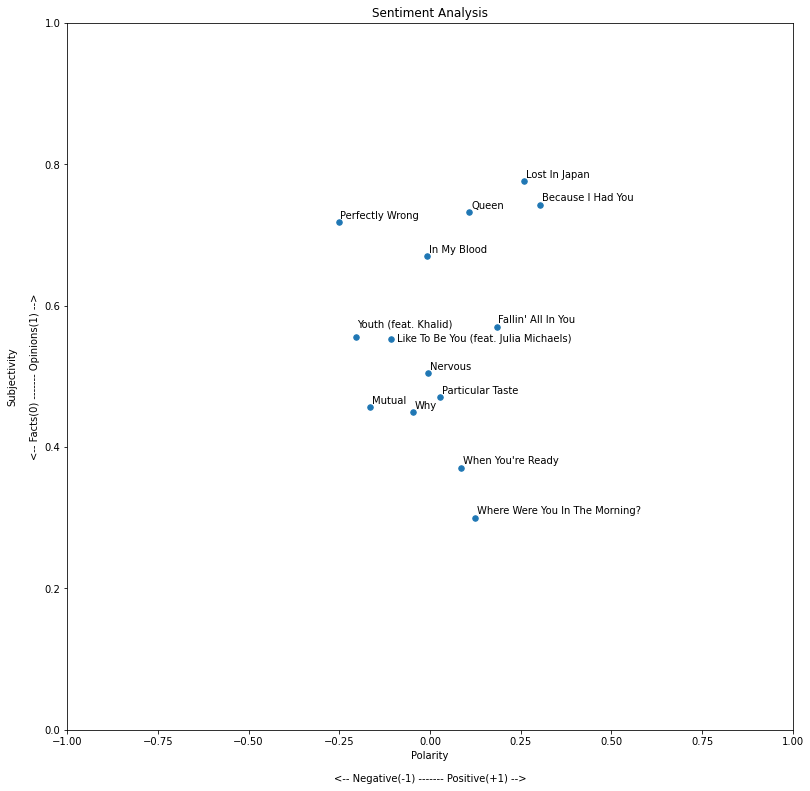

In [85]:
plt.rcParams['figure.figsize'] = [13,13]
plt.scatter(mendesArmyDF.Polarity, mendesArmyDF.Subjectivity,s=30)
plt.title("Sentiment Analysis")
plt.xlabel("Polarity\n\n<-- Negative(-1) ------- Positive(+1) -->")
plt.ylabel("Subjectivity\n\n<-- Facts(0) ------- Opinions(1) -->")
plt.xlim(-1,1)
plt.ylim(0,1)
for i, txt in enumerate(mendesArmyDF.Title):
    xOrigin = mendesArmyDF.loc[mendesArmyDF['Title'] == txt].Polarity + 0.005
    yOrigin = mendesArmyDF.loc[mendesArmyDF['Title'] == txt].Subjectivity + 0.005
    if txt == "Youth (feat. Khalid)":
        yOrigin += 0.009275
    if txt == "Like To Be You (feat. Julia Michaels)":
        xOrigin += 0.01
        yOrigin -= 0.01
    plt.annotate(txt, (xOrigin,yOrigin))
plt.show()

# Word Cloud ☁️

In [12]:
# ! pip install wordcloud

In [13]:
from wordcloud import WordCloud, STOPWORDS

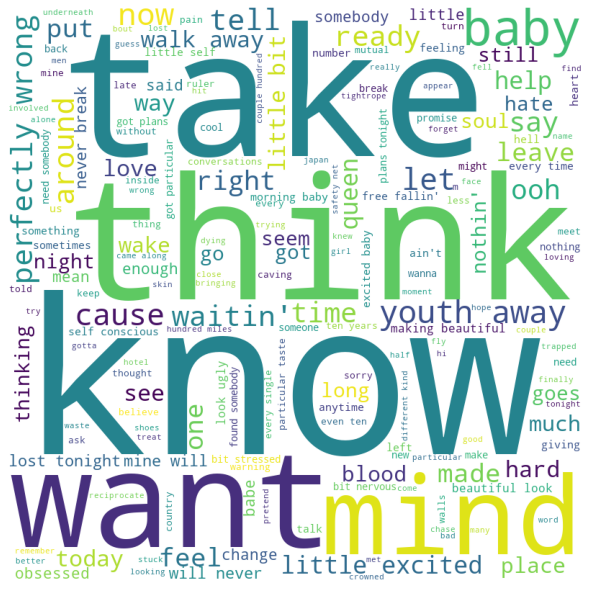

In [30]:
allWords = ""
for i, txt in enumerate(mendesArmyDF.Lyrics):
    allWords += txt
allWords = allWords.lower()
stopWords = set(STOPWORDS)
stopWords = stopWords.union(["yeah", "Oh"])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopWords,
                min_font_size = 10).generate(allWords)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [111]:
#todo:
#figure out lamatization and stemming
#make it pretty (this looks like 💩)
#make more stop words if needed
#corpus and document term matrix

In [108]:
# ! pip install spacy

In [105]:
# ! pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl

In [89]:
# import spacy

In [122]:
# nlp_model = spacy.load('en_core_web_sm')
# tokens = nlp_model(allWords)
# # print (" ".join(token.lemma_ for token in tokens))
# allWords_lemmatized = " ".join(token.lemma_ for token in tokens)

In [124]:
# wordcloud = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 stopwords = stopWords,
#                 min_font_size = 10).generate(allWords_lemmatized)
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
  
# plt.show()

#decided to not go down this route because it made the results even harder to read... 

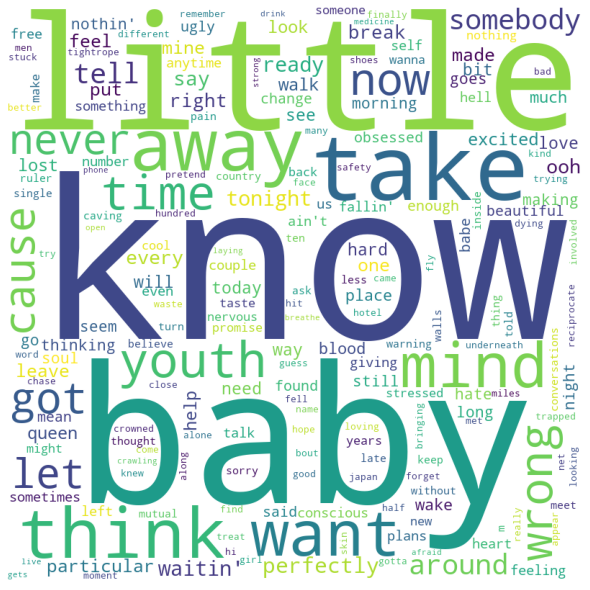

In [132]:
wordcloud = WordCloud(collocations = False, width = 800, height = 800,
                background_color ='white',
                stopwords = stopWords,
                min_font_size = 10).generate(allWords)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [131]:
# WordCloud(collocations=False)
allWords_dict = WordCloud(collocations=False).process_text(allWords)
marklist = sorted(allWords_dict.items(), key=lambda x:x[1], reverse = True)
sortdict = dict(marklist)
sortdict

{'yeah': 65,
 'know': 47,
 'baby': 34,
 'little': 34,
 'take': 31,
 'away': 31,
 'think': 28,
 'oh': 27,
 'want': 23,
 'mind': 22,
 'youth': 22,
 'time': 21,
 'wrong': 20,
 'now': 19,
 'cause': 18,
 'got': 18,
 'never': 18,
 'let': 18,
 'somebody': 17,
 'around': 17,
 'tell': 17,
 'perfectly': 17,
 "waitin'": 16,
 'ready': 16,
 'tonight': 16,
 'say': 15,
 'ooh': 14,
 'every': 14,
 'right': 13,
 'break': 13,
 'feel': 12,
 'one': 12,
 'mine': 12,
 'leave': 12,
 'made': 12,
 'put': 12,
 'particular': 12,
 'help': 11,
 'lost': 11,
 'look': 11,
 'walk': 11,
 'excited': 11,
 'queen': 11,
 'way': 10,
 'need': 10,
 'love': 10,
 'see': 10,
 'bit': 10,
 'will': 10,
 'hard': 10,
 'today': 10,
 'blood': 9,
 'place': 9,
 'wake': 9,
 'much': 9,
 'hate': 8,
 'night': 8,
 'still': 8,
 'thinking': 8,
 'morning': 8,
 'seem': 8,
 "nothin'": 8,
 'go': 8,
 'goes': 8,
 'soul': 8,
 'long': 8,
 'making': 8,
 'enough': 7,
 'found': 7,
 'said': 7,
 'babe': 7,
 'obsessed': 7,
 'mean': 7,
 'change': 7,
 'beautifu

In [147]:
stopWords = STOPWORDS.union({'ooh', 'm', 'mine', 's', 'ah', 'ya', 'hi', 'hey', 'mhm', 'hmm', 'nah', 'uh', 'oh'
                           , 'don', 't', 'kanye', 'uhh', 'tastei', 'youi', 'youhere', 'awayit', 'mei', 'yeah'})

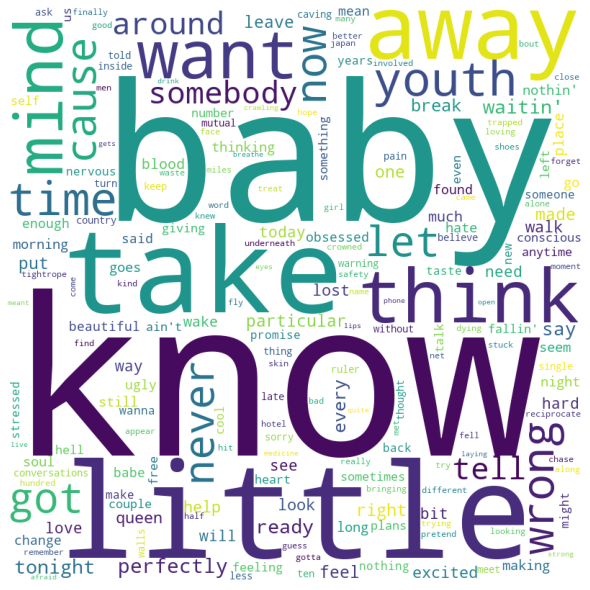

In [148]:
wordcloud = WordCloud(collocations = False, width = 800, height = 800,
                background_color ='white',
                stopwords = stopWords,
                min_font_size = 10).generate(allWords)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
#todo
#figure out how to make word cloud pretty
#can attempt to make polarity and subjectivity graph prettier
#take most common words and group them into emotions